## **Predict my Marks - Regression**

<div class="alert alert-block alert-info">
<b> Project : mlX Regression Challenge </b> <br> 
    
   
    Try to predict the scores of the students in the final G3 exam based on the given features.
    Goal : 최종 G3 시험에서 학생들의 점수를 예측해 보세요.

    
</div>

<div class="alert alert-block alert-info">
    <b>Metric of Evalutaion: Root Mean Square error(RMSE)  </b>
</div>


### Introduce 

- Address : Rural (R) or Urban (U) #농촌(R) 또는 도시(U)
- famsize : #패밀리 사이즈 3(GT3)이상 3(LT3)미만
- Pstatus : Parents stay together (T) / Parents are apart (A) 
- Medu : Mother's education
- Fedu : Father's education
- schoolsup : extra tuition support #추가 등록금 지원
- famsup : family educational support #가족 교육적 지원
- higher : wants to pursue higher education #고둥교육 추구
- romantic : is in a relationship #연애여부
- Dalc : workday alcohol consumption (1= very low and 5=very high) #평일 음주량
- Walc : weekend alcohol consumption (1= very low and 5=very high) #주말 음주량
- G1 : Marks of student in first period
- G2 : Marks of student in second period
- famrel : quality of family relationship

**Goal - to predict student marks in G3 (third period)**

#### import 

In [5]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.preprocessing import FunctionTransformer

%matplotlib inline

### **1. Dataset Description** 

In [6]:
mark_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [7]:
mark_data.shape

(454, 34)

In [8]:
mark_data.head()

,ID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,641,GP,M,17.0,U,GT3,T,2.0,3.0,other,...,5.0,2.0,2.0,1.0,1.0,2.0,2.0,9.237551,12.231771,13.248906
1,510,GP,NaN,16.0,U,LE3,T,2.0,4.0,other,...,4.0,2.0,2.0,1.0,2.0,5.0,2.0,14.232852,12.243083,13.201829
2,516,GP,F,15.0,U,GT3,NaN,2.0,3.0,other,...,3.0,NaN,NaN,NaN,1.0,NaN,4.0,11.206084,NaN,11.100779
3,306,GP,M,15.0,R,GT3,T,3.0,4.0,NaN,...,5.0,3.0,NaN,1.0,1.0,5.0,2.0,12.202626,11.187831,11.176760
4,124,NaN,F,16.0,U,NaN,T,2.0,2.0,NaN,...,4.0,3.0,4.0,1.0,2.0,2.0,6.0,13.134366,11.210160,11.231368


In [19]:
mark_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          454 non-null    int64  
 1   school      405 non-null    object 
 2   sex         396 non-null    object 
 3   age         391 non-null    float64
 4   address     403 non-null    object 
 5   famsize     405 non-null    object 
 6   Pstatus     401 non-null    object 
 7   Medu        396 non-null    float64
 8   Fedu        416 non-null    float64
 9   Mjob        399 non-null    object 
 10  Fjob        411 non-null    object 
 11  reason      407 non-null    object 
 12  guardian    413 non-null    object 
 13  traveltime  411 non-null    float64
 14  studytime   405 non-null    float64
 15  failures    407 non-null    float64
 16  schoolsup   407 non-null    object 
 17  famsup      409 non-null    object 
 18  paid        412 non-null    object 
 19  activities  403 non-null    o

In [7]:
mark_data.columns #데이터 프레임 열의 값, 1차원 리스트

Index(['ID', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [25]:
object_feature = mark_data.select_dtypes("object") #데이터프레임
numeric_feature = mark_data.select_dtypes(np.number) #데이터프레임

In [8]:
from prettytable import PrettyTable


table = PrettyTable()
table.field_names = ['Index', 'Features', 'Unique Values CNT']
for idx, column in enumerate(list(mark_data.columns), start=1):
    nunique = mark_data[column].nunique() #nunique는 na는 제외하고
    table.add_row([idx, column, f'{nunique}'])
    
    
print(f'Total Dataset Value : {mark_data.shape[0]} \n') 
print(table)


Total Dataset Value : 454 

+-------+------------+-------------------+
| Index |  Features  | Unique Values CNT |
+-------+------------+-------------------+
|   1   |     ID     |        454        |
|   2   |   school   |         2         |
|   3   |    sex     |         2         |
|   4   |    age     |         8         |
|   5   |  address   |         2         |
|   6   |  famsize   |         2         |
|   7   |  Pstatus   |         2         |
|   8   |    Medu    |         5         |
|   9   |    Fedu    |         5         |
|   10  |    Mjob    |         5         |
|   11  |    Fjob    |         5         |
|   12  |   reason   |         4         |
|   13  |  guardian  |         3         |
|   14  | traveltime |         4         |
|   15  | studytime  |         4         |
|   16  |  failures  |         4         |
|   17  | schoolsup  |         2         |
|   18  |   famsup   |         2         |
|   19  |    paid    |         2         |
|   20  | activities |    

In [72]:
cat_num_col = [column for column, count in zip(numeric_feature.columns, numeric_feature.nunique().values) if count < 10]

In [73]:
for col in cat_num_col:
    print(f'unique values od {col} : {np.sort(mark_data[col].dropna().unique())}')

unique values od age : [15. 16. 17. 18. 19. 20. 21. 22.]
unique values od Medu : [0. 1. 2. 3. 4.]
unique values od Fedu : [0. 1. 2. 3. 4.]
unique values od traveltime : [1. 2. 3. 4.]
unique values od studytime : [1. 2. 3. 4.]
unique values od failures : [0. 1. 2. 3.]
unique values od famrel : [1. 2. 3. 4. 5.]
unique values od freetime : [1. 2. 3. 4. 5.]
unique values od goout : [1. 2. 3. 4. 5.]
unique values od Dalc : [1. 2. 3. 4. 5.]
unique values od Walc : [1. 2. 3. 4. 5.]
unique values od health : [1. 2. 3. 4. 5.]


- 실제 연속적인 숫자값을 가진 컬럼은 G1, G2, G3
- 3개의 제외한 컬럼은 정수형의 이산적인 데이터-> 범주형 속성을 지님.

In [74]:
for col in object_feature:
    print(f'unique value of {col} : {np.sort(mark_data[col].dropna().unique())}')

unique value of school : ['GP' 'MS']
unique value of sex : ['F' 'M']
unique value of address : ['R' 'U']
unique value of famsize : ['GT3' 'LE3']
unique value of Pstatus : ['A' 'T']
unique value of Mjob : ['at_home' 'health' 'other' 'services' 'teacher']
unique value of Fjob : ['at_home' 'health' 'other' 'services' 'teacher']
unique value of reason : ['course' 'home' 'other' 'reputation']
unique value of guardian : ['father' 'mother' 'other']
unique value of schoolsup : ['no' 'yes']
unique value of famsup : ['no' 'yes']
unique value of paid : ['no' 'yes']
unique value of activities : ['no' 'yes']
unique value of nursery : ['no' 'yes']
unique value of higher : ['no' 'yes']
unique value of internet : ['no' 'yes']
unique value of romantic : ['no' 'yes']


#### 1-2 연속형 특성의 관계

In [78]:
numeric_feature.describe()

,ID,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,454.000000,391.000000,396.000000,416.000000,411.000000,405.000000,407.000000,410.000000,407.000000,421.000000,405.000000,420.000000,405.000000,408.000000,409.000000,410.000000,454.000000
mean,326.458150,16.723785,2.530303,2.324519,1.542579,1.933333,0.218673,3.868293,3.189189,3.161520,1.540741,2.269048,3.454321,3.723039,11.573324,11.662033,11.992548
std,190.663745,1.213354,1.154667,1.105506,0.729191,0.828335,0.577787,0.977607,1.074139,1.161912,0.952560,1.266983,1.476218,4.905922,2.696468,2.967221,3.292919
min,1.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,5.183922,0.120467,0.102433
25%,158.750000,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,3.000000,2.500000,2.000000,1.000000,1.000000,2.000000,0.000000,10.122587,10.114836,10.196103
50%,328.500000,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.216576,11.239625,12.139594
75%,494.750000,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,4.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.233304,13.216036,14.148699
max,646.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.248120,19.102766,19.182714


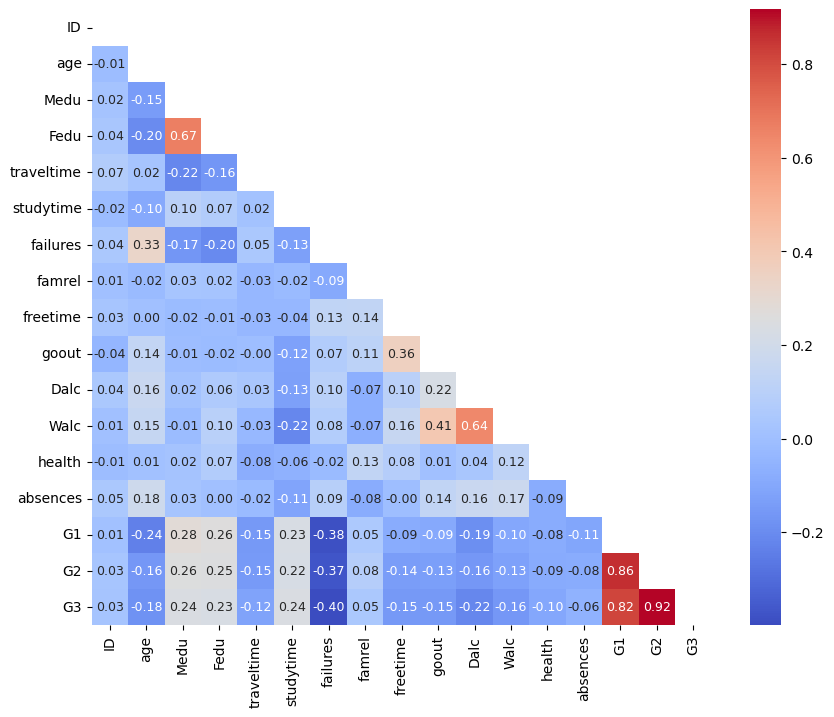

In [80]:
fig, ax = plt.subplots(figsize=(10,8))
mask = np.triu(numeric_feature.corr())
sns.heatmap(numeric_feature.corr(),  cmap='coolwarm', annot=True, fmt='.2f', annot_kws={'size':9}, ax=ax, mask=mask)
plt.show()

In [81]:
numeric_feature.corr()

,ID,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
ID,1.000000,-0.012065,0.019643,0.035416,0.073072,-0.016231,0.043817,0.005109,0.028622,-0.041700,0.043134,0.005057,-0.010463,0.046663,0.012023,0.031401,0.026889
age,-0.012065,1.000000,-0.146558,-0.201874,0.023180,-0.095282,0.329788,-0.020204,0.003457,0.138942,0.162674,0.146119,0.010095,0.184141,-0.239413,-0.161939,-0.178264
Medu,0.019643,-0.146558,1.000000,0.666163,-0.218110,0.102645,-0.165230,0.032516,-0.017834,-0.009140,0.015199,-0.014118,0.018897,0.026404,0.280957,0.256376,0.239106
Fedu,0.035416,-0.201874,0.666163,1.000000,-0.163616,0.069010,-0.203828,0.023260,-0.011090,-0.016773,0.061044,0.095626,0.070437,0.004128,0.259429,0.251924,0.231408
traveltime,0.073072,0.023180,-0.218110,-0.163616,1.000000,0.015039,0.047055,-0.034413,-0.034088,-0.004668,0.034513,-0.034026,-0.078735,-0.019940,-0.153117,-0.150762,-0.118959
studytime,-0.016231,-0.095282,0.102645,0.069010,0.015039,1.000000,-0.131593,-0.021985,-0.039171,-0.122413,-0.127165,-0.218198,-0.061227,-0.113925,0.232733,0.224287,0.240131
failures,0.043817,0.329788,-0.165230,-0.203828,0.047055,-0.131593,1.000000,-0.092607,0.127448,0.069393,0.096989,0.076035,-0.020240,0.090521,-0.384373,-0.371524,-0.399185
famrel,0.005109,-0.020204,0.032516,0.023260,-0.034413,-0.021985,-0.092607,1.000000,0.135534,0.114997,-0.074751,-0.071108,0.134016,-0.081800,0.052255,0.082692,0.048162
freetime,0.028622,0.003457,-0.017834,-0.011090,-0.034088,-0.039171,0.127448,0.135534,1.000000,0.361758,0.102035,0.156084,0.083677,-0.004277,-0.085227,-0.141170,-0.153328
goout,-0.041700,0.138942,-0.009140,-0.016773,-0.004668,-0.122413,0.069393,0.114997,0.361758,1.000000,0.224546,0.407357,0.006310,0.135184,-0.093982,-0.132964,-0.152482


In [93]:
#unstack : df to series 
numeric_feature.corr()[(numeric_feature.corr() != 0) & (numeric_feature.corr() != 1)].unstack()

ID  ID                 NaN
    age          -0.012065
    Medu          0.019643
    Fedu          0.035416
    traveltime    0.073072
                    ...   
G3  health       -0.102869
    absences     -0.055195
    G1            0.815049
    G2            0.917332
    G3                 NaN
Length: 289, dtype: float64

In [97]:
coor_df = pd.DataFrame(
    numeric_feature.corr().stack().sort_values(ascending=False, key=np.abs)
        .drop_duplicates()[:-1],
    columns=["상관계수"]
)
coor_df.head(15)

,,상관계수
ID,ID,1.000000
G3,G2,0.917332
G1,G2,0.864020
G3,G1,0.815049
Medu,Fedu,0.666163
Walc,Dalc,0.643166
goout,Walc,0.407357
G3,failures,-0.399185
G1,failures,-0.384373
failures,G2,-0.371524


In [82]:
coor_df = pd.DataFrame(numeric_feature.corr()[(numeric_feature.corr() != 0) & (numeric_feature.corr() != 1)].unstack()
                       .sort_values(ascending=False, key=np.abs).drop_duplicates()[:-1], columns=["상관계수"])
coor_df.head(15)

상관계수
G3       G2        0.917332
G2       G1        0.864020
G1       G3        0.815049
Medu     Fedu      0.666163
Walc     Dalc      0.643166
         goout     0.407357
G3       failures -0.399185
failures G1       -0.384373
G2       failures -0.371524
goout    freetime  0.361758
age      failures  0.329788
G1       Medu      0.280957
         Fedu      0.259429
Medu     G2        0.256376
G2       Fedu      0.251924

#### 결측치(missing value)

In [67]:
mark_data.describe(include='all')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,405,396,391.000000,403,405,401,396.000000,416.000000,399,411,...,410.000000,407.000000,421.000000,405.000000,420.000000,405.000000,408.000000,409.000000,410.000000,454.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,277,226,NaN,283,289,356,NaN,NaN,165,231,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.723785,NaN,NaN,NaN,2.530303,2.324519,NaN,NaN,...,3.868293,3.189189,3.161520,1.540741,2.269048,3.454321,3.723039,11.573324,11.662033,11.992548
std,NaN,NaN,1.213354,NaN,NaN,NaN,1.154667,1.105506,NaN,NaN,...,0.977607,1.074139,1.161912,0.952560,1.266983,1.476218,4.905922,2.696468,2.967221,3.292919
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,5.183922,0.120467,0.102433
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,...,3.000000,2.500000,2.000000,1.000000,1.000000,2.000000,0.000000,10.122587,10.114836,10.196103
50%,NaN,NaN,17.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.216576,11.239625,12.139594
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,4.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.233304,13.216036,14.148699


In [65]:
# missing value check 
mark_data.isna().sum()

school        49
sex           58
age           63
address       51
famsize       49
Pstatus       53
Medu          58
Fedu          38
Mjob          55
Fjob          43
reason        47
guardian      41
traveltime    43
studytime     49
failures      47
schoolsup     47
famsup        45
paid          42
activities    51
nursery       45
higher        36
internet      48
romantic      43
famrel        44
freetime      47
goout         33
Dalc          49
Walc          34
health        49
absences      46
G1            45
G2            44
G3             0
dtype: int64

In [129]:
mark_data.isna().any(axis=1).sum() #총 453행 중에 1개이상 결측치 443행 ; 대부분 1개이상 결측치 있음

443

### method

In [4]:
mark_data.drop('ID', inplace=True, axis=1)

#### 결측치 대체 1.mark_1
1. 연속적 숫자 컬럼 ('G1','G2' > 평균)
2. 카테고리컬 변환 ('age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences') > 최빈값
3. 카테고리 컬럼 > 최빈값

In [53]:
mark_2 = mark_data.copy()

In [54]:
num_cols = ['G1','G2']
obgect_cols = mark_2.select_dtypes(exclude=np.number).columns.tolist()
category_cols = mark_2.select_dtypes(include=np.number).drop(columns=['G1','G2','G3']).columns.tolist()

In [55]:
category_cols 

['ID',
 'age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences']

In [144]:
for col in category_cols:
    mark_2[col] = mark_2[col].astype('category')

In [145]:
mark_2.dtypes

school          object
sex             object
age           category
address         object
famsize         object
Pstatus         object
Medu          category
Fedu          category
Mjob            object
Fjob            object
reason          object
guardian        object
traveltime    category
studytime     category
failures      category
schoolsup       object
famsup          object
paid            object
activities      object
nursery         object
higher          object
internet        object
romantic        object
famrel        category
freetime      category
goout         category
Dalc          category
Walc          category
health        category
absences      category
G1             float64
G2             float64
G3             float64
dtype: object

In [146]:
category_cols

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences']

In [56]:
from sklearn.model_selection import train_test_split

target = mark_2['G3']
features = mark_2.drop(columns='G3')

train_X, test_X, train_y, test_y = train_test_split(features, target, test_size=0.2, random_state=42)

In [57]:
train_X.shape, train_y.shape

((363, 33), (363,))

In [139]:
test_X.shape, test_y.shape

((91, 32), (91,))

In [140]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 301 to 154
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      83 non-null     object 
 1   sex         80 non-null     object 
 2   age         81 non-null     float64
 3   address     81 non-null     object 
 4   famsize     79 non-null     object 
 5   Pstatus     79 non-null     object 
 6   Medu        82 non-null     float64
 7   Fedu        81 non-null     float64
 8   Mjob        76 non-null     object 
 9   Fjob        83 non-null     object 
 10  reason      84 non-null     object 
 11  guardian    81 non-null     object 
 12  traveltime  80 non-null     float64
 13  studytime   78 non-null     float64
 14  failures    78 non-null     float64
 15  schoolsup   78 non-null     object 
 16  famsup      81 non-null     object 
 17  paid        82 non-null     object 
 18  activities  79 non-null     object 
 19  nursery     80 non-null     objec

In [141]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [142]:
object_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

In [143]:
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('mm', MinMaxScaler()),
])

In [147]:
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('mm', MinMaxScaler()),
])

In [148]:
precessor = ColumnTransformer(
    transformers=[('num', num_transformer, num_cols),
                  ('object', object_transformer, object_cols),
                  ('category', cat_transformer, category_cols)],
    remainder='passthrough'
)

In [149]:
precessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('mm', MinMaxScaler())]),
                                 ['G1', 'G2']),
                                ('object',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['school', 'sex', 'address', 'famsize',
                                  'Pstatus', 'Mjob', 'Fjob', 'reason',
                                  'guardian', 'schoolsup', 'famsup', 'paid',
                                  'activities', 'nursery', 'higher', 'internet',
                                  'romantic']),
                                ('category',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('mm', MinMaxScaler())]),
                                 ['age', 'Medu', 'Fedu', 'traveltime',
                                  'studytime', 'failures', 'famrel', 'freetime',
                                  'goout', 'Dalc', 'Walc', 'health',
                                  'absences'])])

In [313]:
precessor.fit(train_X,train_y)

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('mm', MinMaxScaler())]),
                                 ['G1', 'G2']),
                                ('object',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['school', 'sex', 'age', 'address', 'famsize',
                                  'Pstatus', 'Medu',...
                                  'famsup', 'paid', 'activities', 'nursery',
                                  'higher', 'internet', 'romantic', 'famrel',
                                  'freetime', 'goout', 'Dalc', 'Walc', 'health',
                                  'absences']),
                                ('category',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('mm', MinMaxScaler())]),
                                 ['age', 'Medu', 'Fedu', 'traveltime',
                                  'studytime', 'failures', 'famrel', 'freetime',
                                  'goout', 'Dalc', 'Walc', 'health',
                                  'absences'])])

In [150]:
from sklearn.metrics import mean_squared_error


In [152]:
base2_pipeline = Pipeline(
    [('precessing', precessor),
     ('model', LinearRegression())]
)

In [154]:
base2_pipeline.fit(train_X, train_y)

Pipeline(steps=[('precessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('mm',
                                                                   MinMaxScaler())]),
                                                  ['G1', 'G2']),
                                                 ('object',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['school', 'sex', 'address',
                                                   'fa...
                                                   'Fjob', 'reason', 'guardian',
                                                   'schoolsup', 'famsup',
                                                   'paid', 'activities',
                                                   'nursery', 'higher',
                                                   'internet', 'romantic']),
                                                 ('category',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('mm',
                                                                   MinMaxScaler())]),
                                                  ['age', 'Medu', 'Fedu',
                                                   'traveltime', 'studytime',
                                                   'failures', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health',
                                                   'absences'])])),
                ('model', LinearRegression())])

In [155]:
y_pred = base2_pipeline.predict(test_X)

In [159]:
base2_pipeline.score(train_X, train_y)

0.789987931479493

In [158]:
base2_pipeline.score(test_X, test_y)

0.8612934462181812

In [156]:
y_pred = base2_pipeline.predict(test_X) # 예측 값
mean_squared_error(y_pred, test_y, squared = True)

1.6863941493638592

타겟 G3빼고 전부 결측치 존재

### 2. **EDA**

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [44]:
num_cols = ['G1','G2']
object_cols = mark_data.select_dtypes(exclude=np.number).columns.tolist()
category_cols = mark_data.select_dtypes(include=np.number).drop(columns=['G1','G2','G3']).columns.tolist()

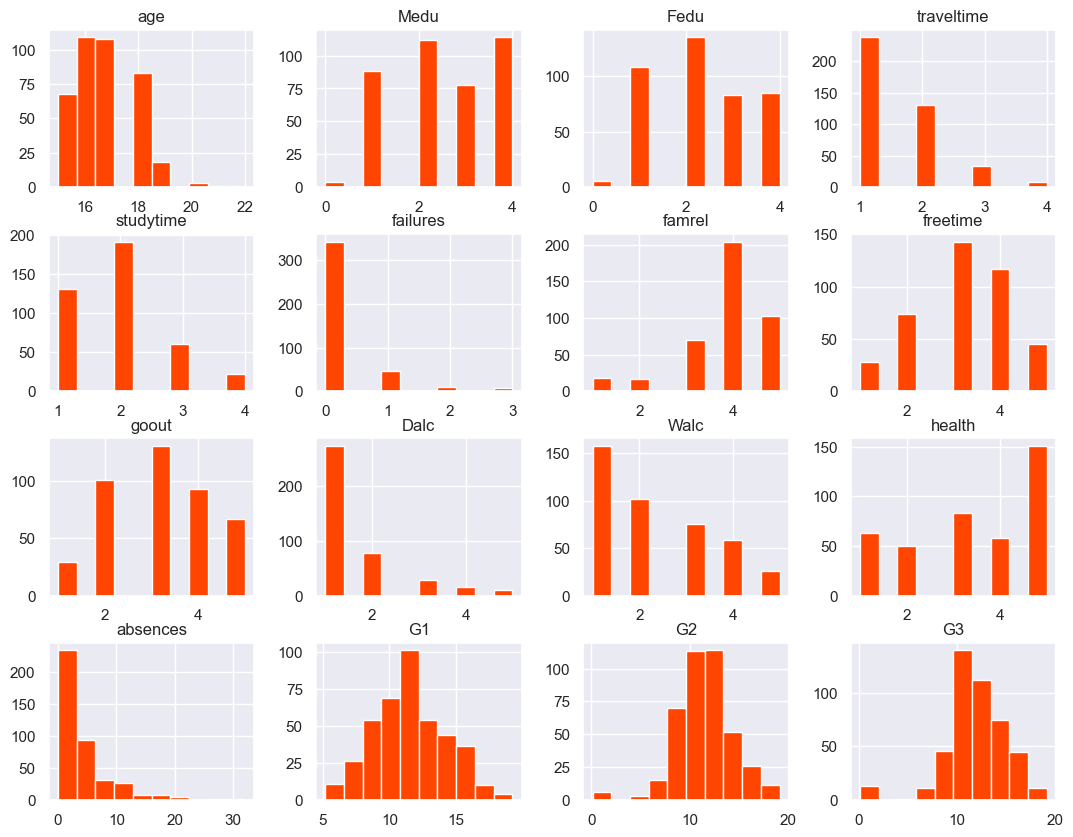

In [135]:
#값의 분포 확인하기 - numeric
mark_data[numeric_cols].hist(bins=10, figsize=(13,10), color='orangered');

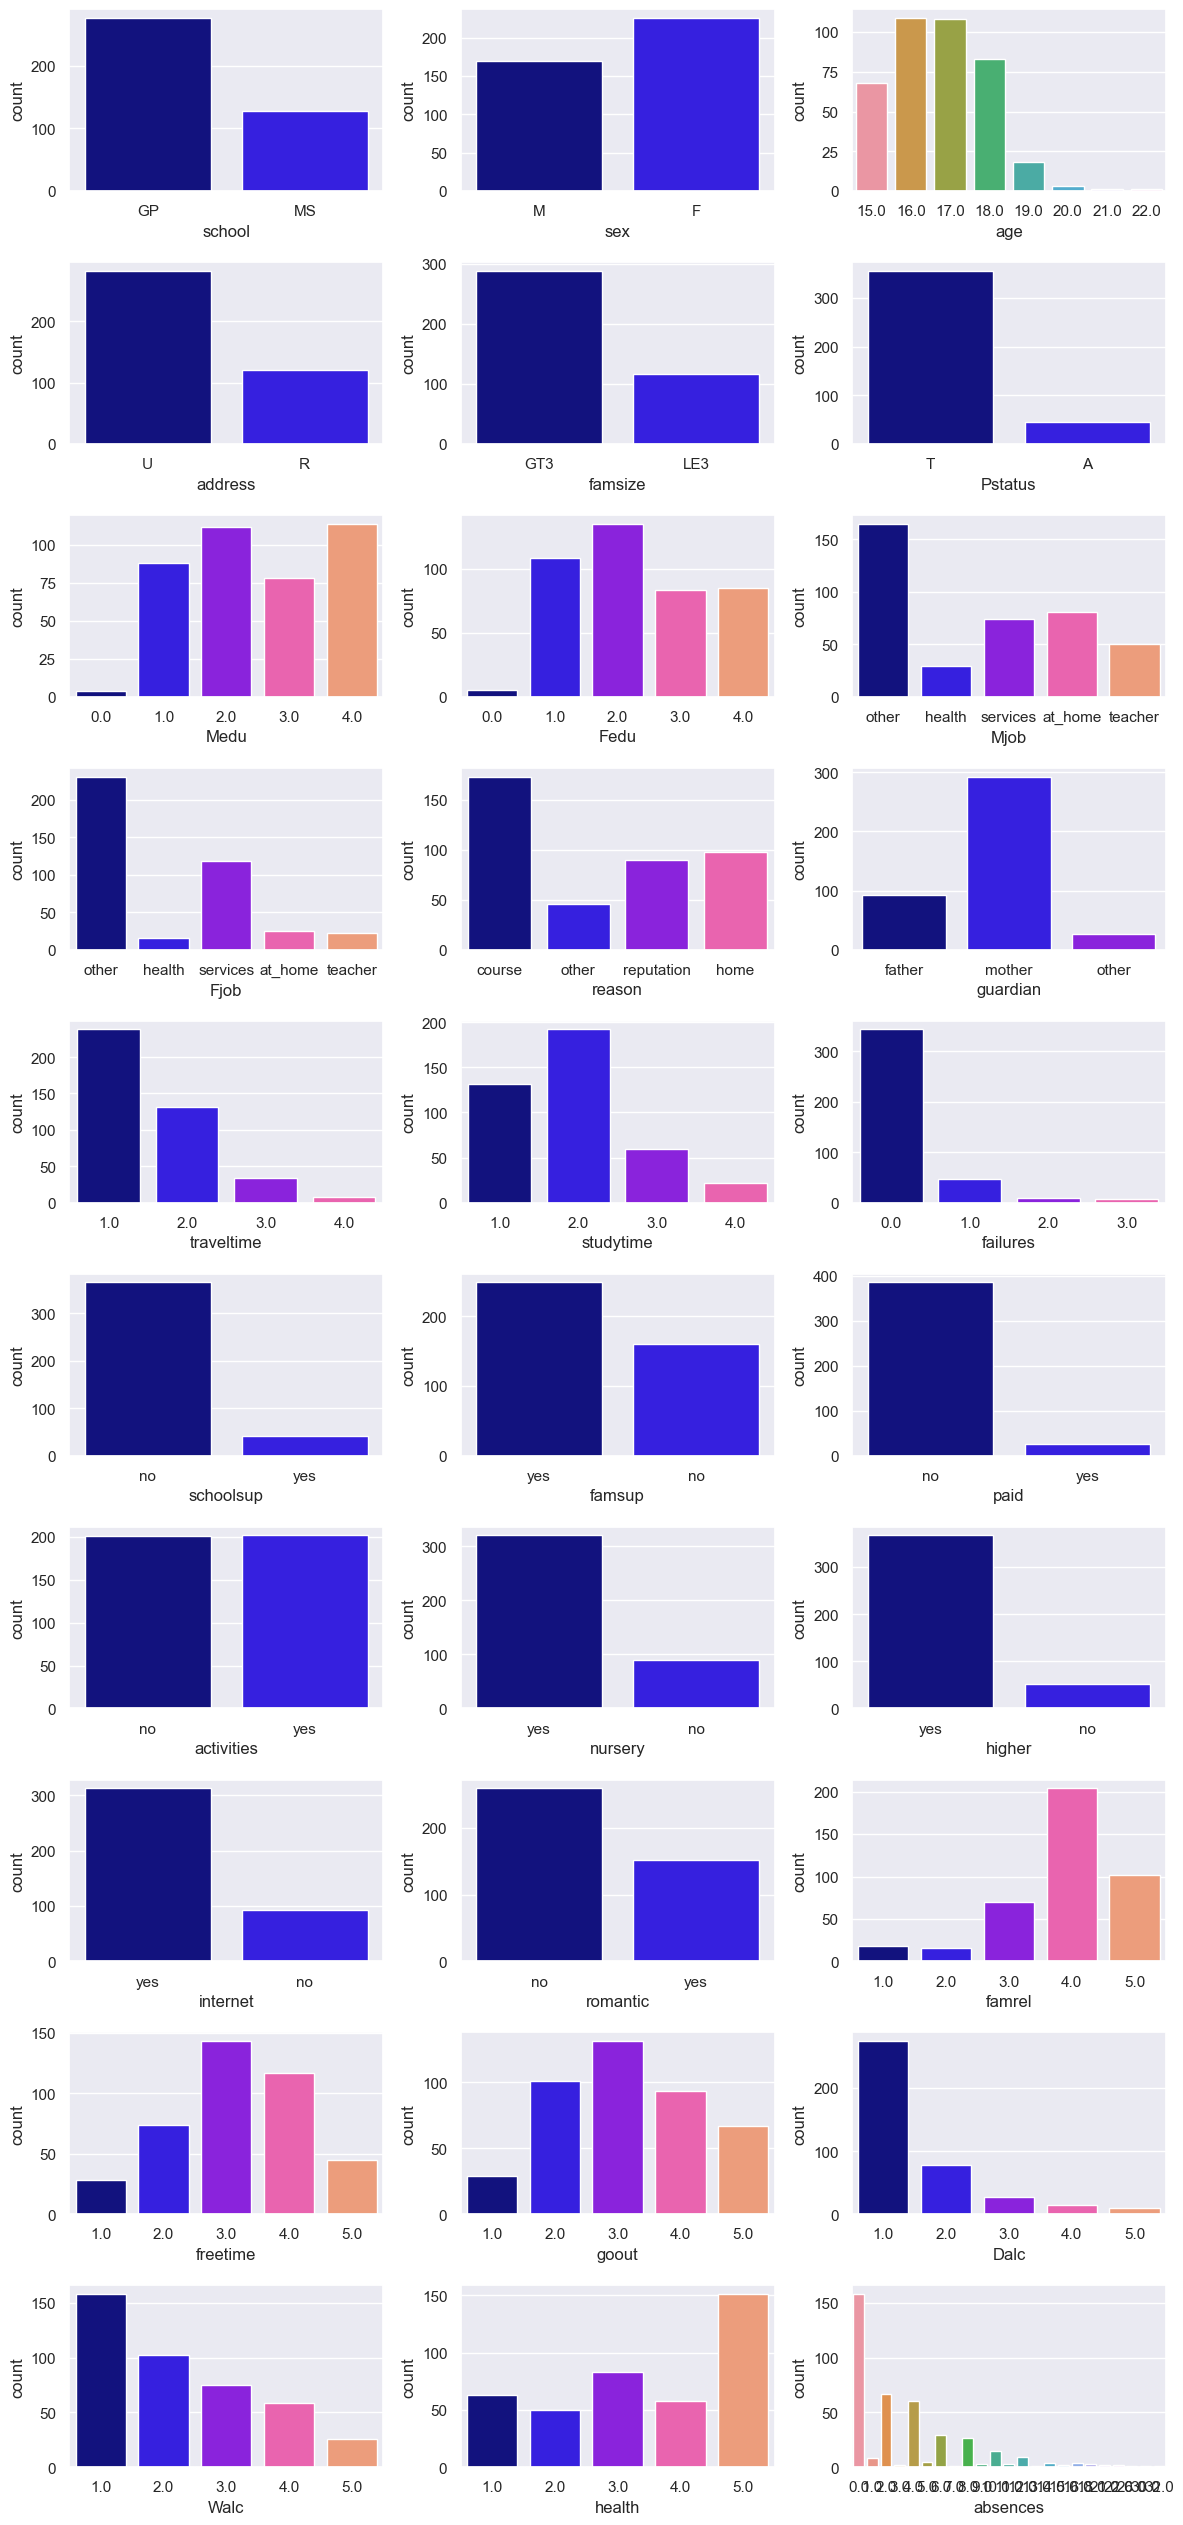

In [97]:
sns.set(palette="gnuplot2")
plt.figure(figsize=(12, 30), layout='tight')

for col in object_cols:
    plt.subplot(12, 3, object_cols.index(col) + 1)  # Adjust the subplot layout as needed
    sns.countplot(x=col, data=mark_data)

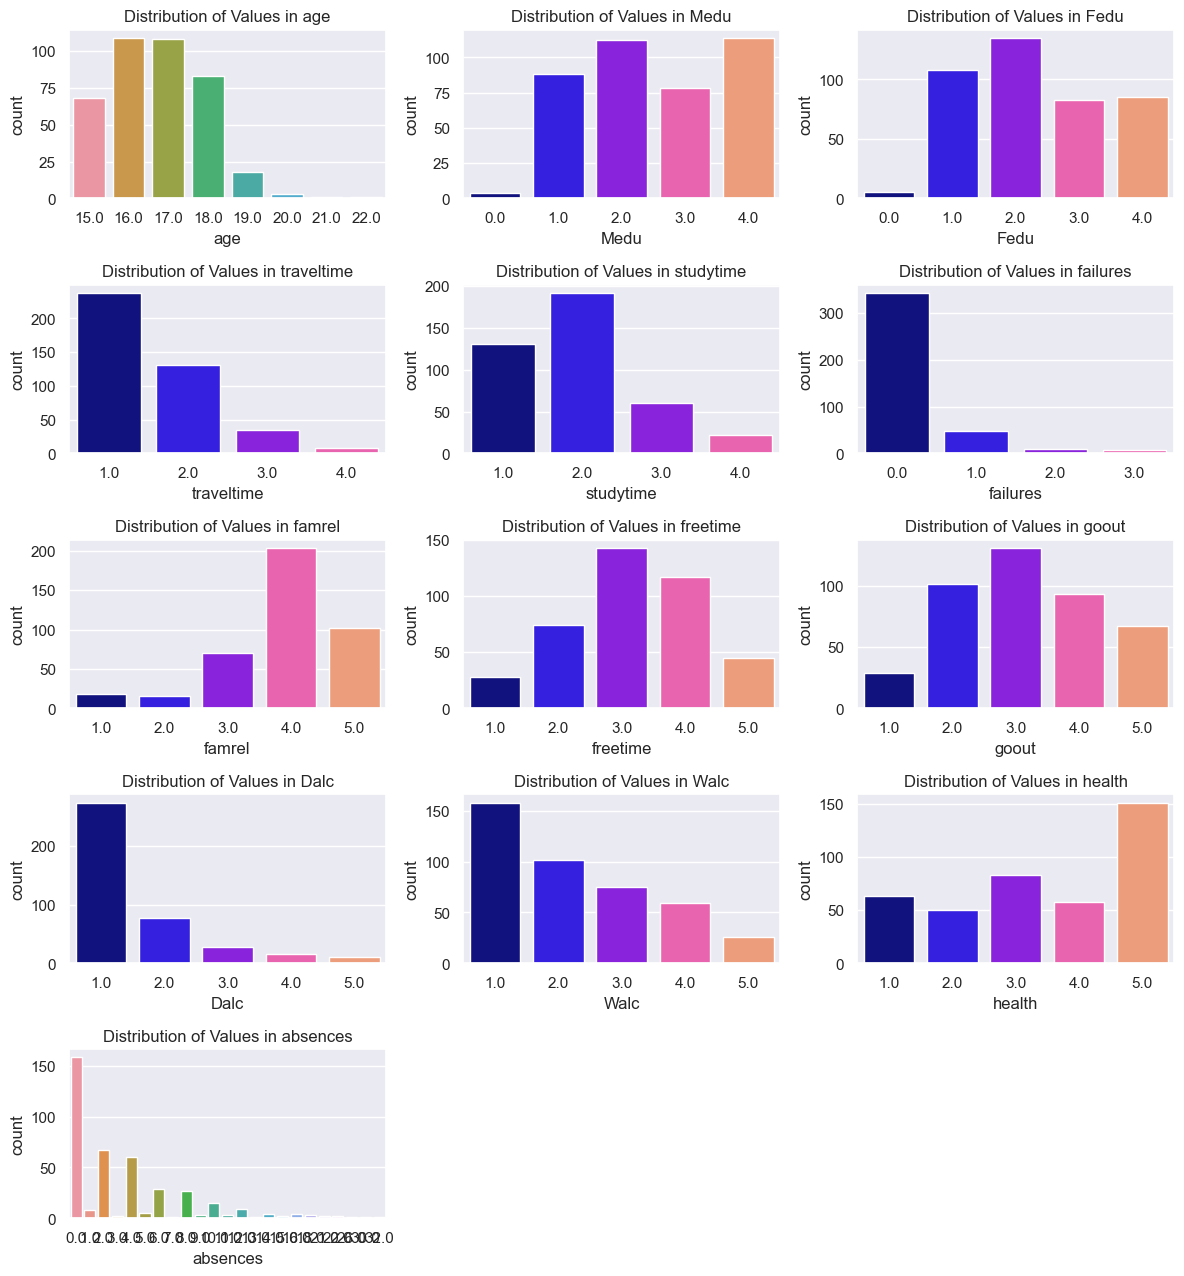

In [45]:
sns.set(palette="gnuplot2")
plt.figure(figsize=(12, 15), layout='tight')

for col in category_cols:
    plt.subplot(6, 3, category_cols.index(col) + 1)  # Adjust the subplot layout as needed
    plt.title(f'Distribution of Values in {col}')
    sns.countplot(x=col, data=mark_data)

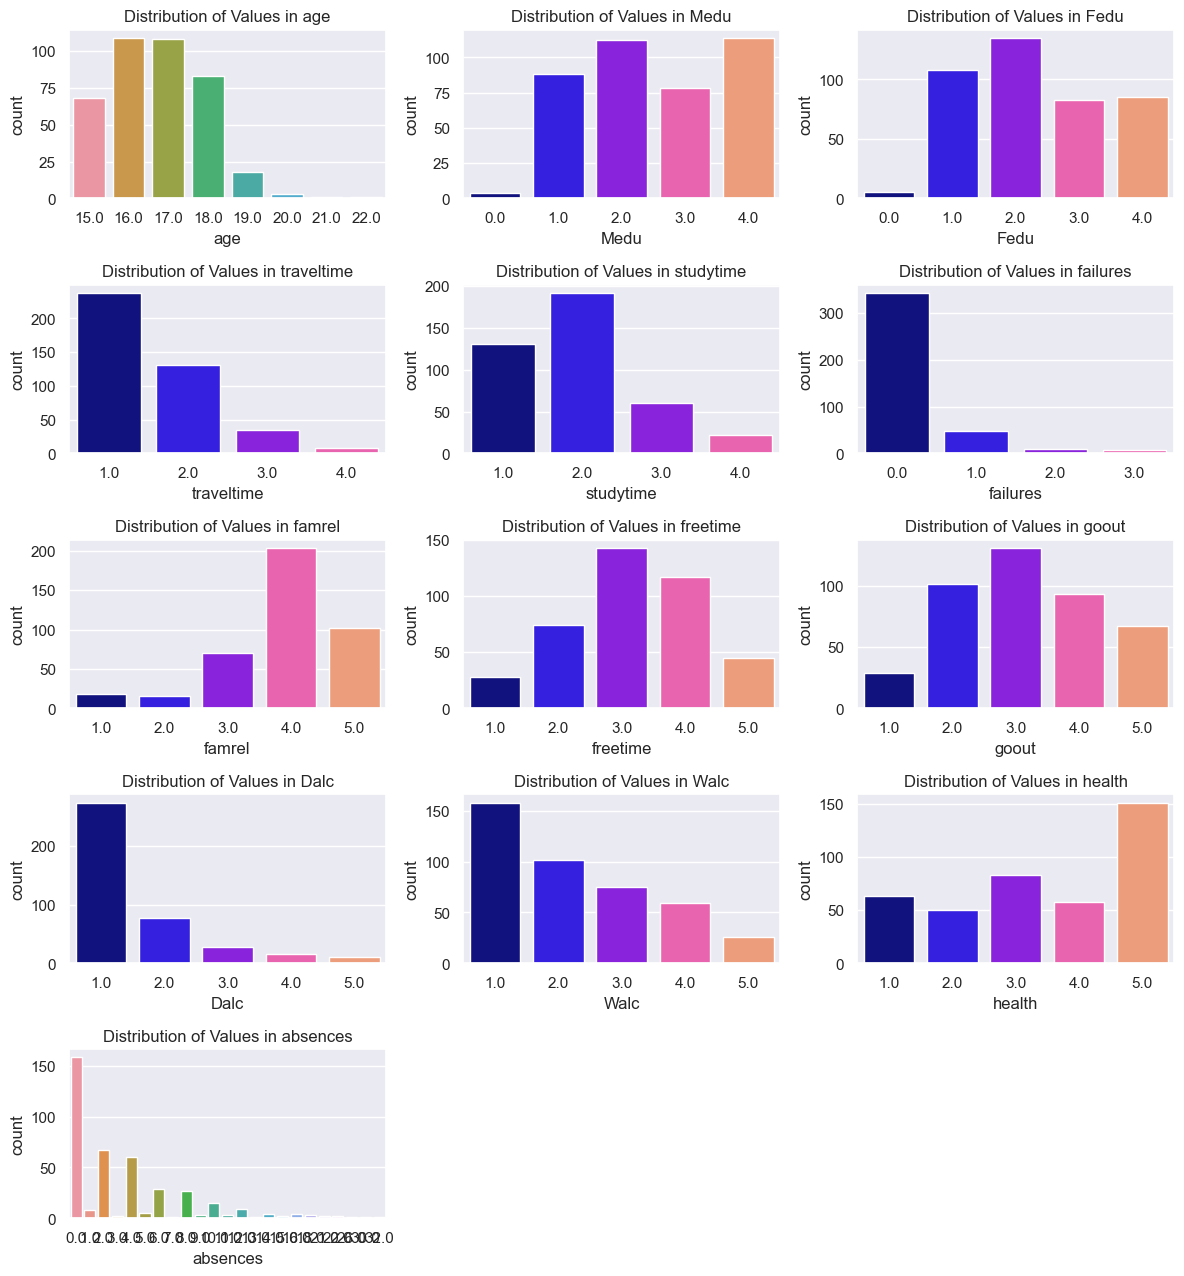

In [45]:
sns.set(palette="gnuplot2")
plt.figure(figsize=(12, 15), layout='tight')

for col in category_cols:
    plt.subplot(6, 3, category_cols.index(col) + 1)  # Adjust the subplot layout as needed
    plt.title(f'Distribution of Values in {col}')
    sns.countplot(x=col, data=mark_data)

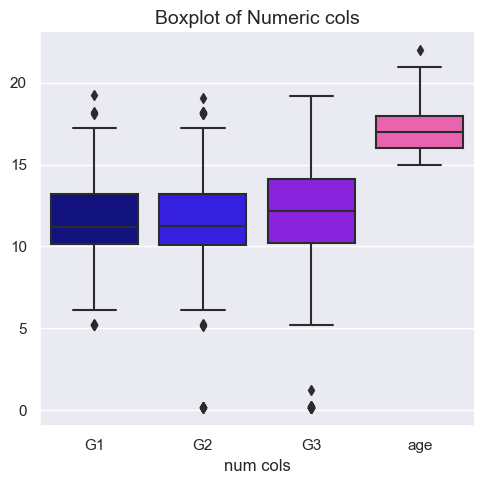

In [46]:
cont_cols = ['G1','G2','G3', 'age']
n_rows = len(cont_cols)
fig, axs = plt.subplots(1, 1, figsize=(5, 5))


sns.boxplot(data=mark_data[cont_cols], ax=axs)
axs.set_title(f'Boxplot of Numeric cols', fontsize=14)
axs.set_xlabel('num cols', fontsize=12)
sns.despine()

plt.tight_layout()
plt.show()

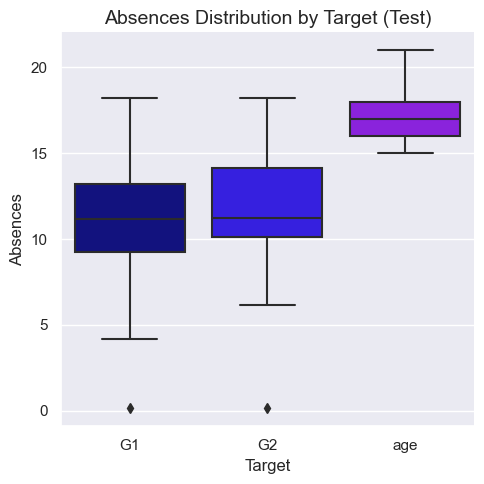

In [47]:
cont_cols = ['G1','G2', 'age']
n_rows = len(cont_cols)
fig, axs = plt.subplots(1, 1, figsize=(5, 5))


sns.boxplot(data=test_data[cont_cols], ax=axs)
axs.set_title(f'{col.title()} Distribution by Target (Test)', fontsize=14)
axs.set_xlabel('Target', fontsize=12)
axs.set_ylabel(col.title(), fontsize=12)
sns.despine()

plt.tight_layout()
plt.show()

In [29]:
def count_outlier_count(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR_range = Q3-Q1
    up_fence = Q3+1.5*IQR_range
    low_fence = Q1-1.5*IQR_range
    outliers_count = df[(df[col] < low_fence) | (df[col] > up_fence)].shape[0]
    
    return outliers_count

In [141]:
count_outlier_count(mark_data, 'G2') / 453 * 100

3.7527593818984544

In [27]:
count_outlier_count(mark_data, 'age') 

1

In [28]:
count_outlier_count(test_data, 'age') 

0

In [142]:
count_outlier_count(mark_data, 'G1')  / 453 * 100

1.7660044150110374

In [105]:
corr = mark_data[numeric_cols].corr()

<Axes: >

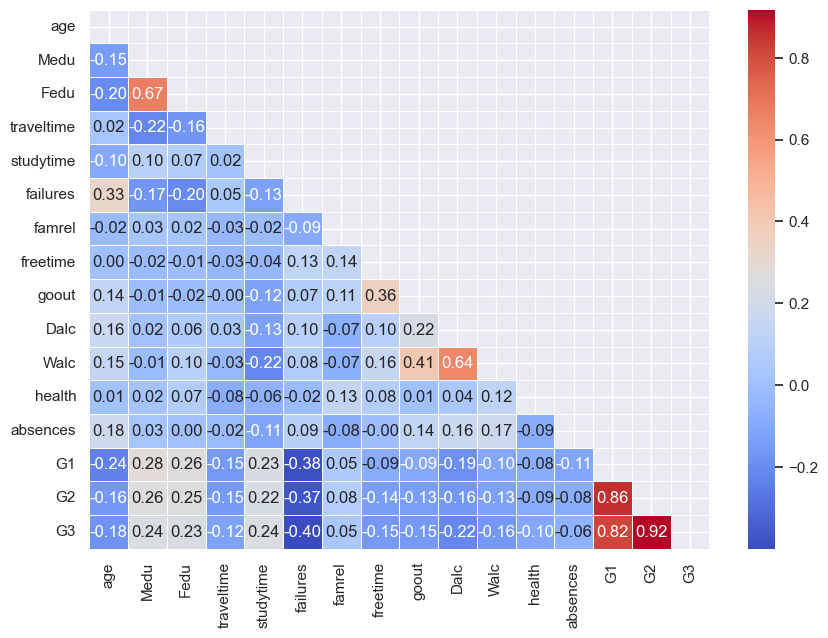

In [337]:
mask = np.triu(np.ones_like(corr))
plt.figure(figsize=(10,7))
sns.heatmap(corr, mask=mask, fmt='.2f', linewidth=.5, annot=True, cmap='coolwarm')

In [91]:
numeric_cols

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [93]:
category_cols

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [88]:
mark_data.reason.value_counts()

course        173
home           98
reputation     90
other          46
Name: reason, dtype: int64

In [32]:
parent = mark_data[['Medu','Fedu', 'G3']]

In [116]:
parent.isna().sum()

Medu    0
Fedu    0
Mjob    0
Fjob    0
G3      0
dtype: int64

In [ ]:
parent.fillna

In [122]:
parent = pd.get_dummies(data=parent,columns=['Mjob', 'Fjob'], drop_first=True)

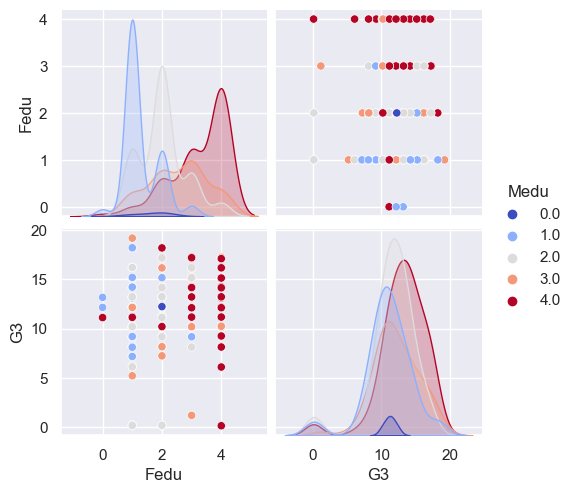

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
# 피쳐와 타겟 간의 pairplot 그리기
sns.pairplot(parent, hue='Medu', kind='scatter', palette='coolwarm')
plt.show()

#### 결측치 대체 2.mark_2
1. 연속적 숫자 컬럼 ('G1','G2' > 중앙값) > minmax 스케일
2. 카테고리컬 변환 ('age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences') > 최빈값 > minmax 스케일
3. 카테고리 컬럼 > 최빈값 > 원핫 인코딩

In [93]:
mark_2 = mark_data.copy()

In [94]:
num_cols = ['G1','G2']
object_cols = mark_2.select_dtypes(exclude=np.number).columns.tolist()
category_cols = mark_2.select_dtypes(include=np.number).drop(columns=['G1','G2','G3']).columns.tolist()

In [51]:
category_cols 

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences']

In [52]:
for col in category_cols:
    mark_2[col] = mark_2[col].astype('category')

In [53]:
category_cols

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences']

In [54]:
from sklearn.model_selection import train_test_split

target = mark_2['G3']
features = mark_2.drop(columns='G3')

train_X, test_X, train_y, test_y = train_test_split(features, target, test_size=0.2, random_state=42)

In [55]:
train_X.shape, train_y.shape

((363, 32), (363,))

In [56]:
test_X.shape, test_y.shape

((91, 32), (91,))

In [58]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [59]:
object_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

In [95]:
object_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))

])

In [96]:
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))

])

In [97]:
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

In [60]:
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('mm', MinMaxScaler()),
])

In [61]:
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('mm', MinMaxScaler()),
])

In [98]:
precessor = ColumnTransformer(
    transformers=[('num', num_transformer, num_cols),
                  ('object', object_transformer, object_cols),
                  ('category', cat_transformer, category_cols)],
    remainder='passthrough'
)

In [99]:
precessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['G1', 'G2']),
                                ('object',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['school', 'sex', 'address', 'famsize',
                                  'Pstatus', 'Mjob', 'Fjob', 'reason',
                                  'guardian', 'schoolsup', 'famsup', 'paid',
                                  'activities', 'nursery', 'higher', 'internet',
                                  'romantic']),
                                ('category',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['age', 'Medu', 'Fedu', 'traveltime',
                                  'studytime', 'failures', 'famrel', 'freetime',
                                  'goout', 'Dalc', 'Walc', 'health',
                                  'absences'])])

In [100]:
simple_df =  precessor.fit(mark_2)

In [101]:
simple_df

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['G1', 'G2']),
                                ('object',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['school', 'sex', 'address', 'famsize',
                                  'Pstatus', 'Mjob', 'Fjob', 'reason',
                                  'guardian', 'schoolsup', 'famsup', 'paid',
                                  'activities', 'nursery', 'higher', 'internet',
                                  'romantic']),
                                ('category',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['age', 'Medu', 'Fedu', 'traveltime',
                                  'studytime', 'failures', 'famrel', 'freetime',
                                  'goout', 'Dalc', 'Walc', 'health',
                                  'absences'])])

In [120]:
col = precessor.get_feature_names_out().tolist()

In [110]:
simple_df = pd.DataFrame(precessor.fit_transform(mark_2), columns=col)

In [118]:
num = mark_2.select_dtypes(include=np.number).columns.tolist()

In [123]:
simple_df.columns

Index(['num__G1', 'num__G2', 'object__school', 'object__sex',
       'object__address', 'object__famsize', 'object__Pstatus', 'object__Mjob',
       'object__Fjob', 'object__reason', 'object__guardian',
       'object__schoolsup', 'object__famsup', 'object__paid',
       'object__activities', 'object__nursery', 'object__higher',
       'object__internet', 'object__romantic', 'category__age',
       'category__Medu', 'category__Fedu', 'category__traveltime',
       'category__studytime', 'category__failures', 'category__famrel',
       'category__freetime', 'category__goout', 'category__Dalc',
       'category__Walc', 'category__health', 'category__absences',
       'remainder__G3'],
      dtype='object')

In [124]:
num = ['num__G1', 'num__G2',  'category__age',
       'category__Medu', 'category__Fedu', 'category__traveltime',
       'category__studytime', 'category__failures', 'category__famrel',
       'category__freetime', 'category__goout', 'category__Dalc',
       'category__Walc', 'category__health', 'category__absences',
       'remainder__G3']

In [132]:
simple_df[num] = simple_df[num].astype('float64')
simple_df.dtypes

num__G1                 float64
num__G2                 float64
object__school           object
object__sex              object
object__address          object
object__famsize          object
object__Pstatus          object
object__Mjob             object
object__Fjob             object
object__reason           object
object__guardian         object
object__schoolsup        object
object__famsup           object
object__paid             object
object__activities       object
object__nursery          object
object__higher           object
object__internet         object
object__romantic         object
category__age           float64
category__Medu          float64
category__Fedu          float64
category__traveltime    float64
category__studytime     float64
category__failures      float64
category__famrel        float64
category__freetime      float64
category__goout         float64
category__Dalc          float64
category__Walc          float64
category__health        float64
category

In [314]:
base2_pipeline = Pipeline(
    [('precessing', precessor),
     ('model', LinearRegression())]
)

In [316]:
base2_pipeline.fit(train_X, train_y)

Pipeline(steps=[('precessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('mm',
                                                                   MinMaxScaler())]),
                                                  ['G1', 'G2']),
                                                 ('object',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['school', 'sex', 'age',
                                                   'addres...
                                                   'nursery', 'higher',
                                                   'internet', 'romantic',
                                                   'famrel', 'freetime',
                                                   'goout', 'Dalc', 'Walc',
                                                   'health', 'absences']),
                                                 ('category',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('mm',
                                                                   MinMaxScaler())]),
                                                  ['age', 'Medu', 'Fedu',
                                                   'traveltime', 'studytime',
                                                   'failures', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health',
                                                   'absences'])])),
                ('model', LinearRegression())])

In [266]:
from sklearn.metrics import mean_squared_error

In [317]:
y_pred = base2_pipeline.predict(test_X)

In [318]:
y_pred = base2_pipeline.predict(test_X) # 예측 값
mean_squared_error(y_pred, test_y, squared = True)

1.1305965424413255e+25

타겟 G3빼고 전부 결측치 존재

#### 결측치 대체 3.mark_3

'failures' -> 삭제빈값

1. 연속적 숫자 컬럼 ('G1','G2') -> 'studytime' 그룹별 평균 


['studytime','famrel','Walc','health','age'] -> median

   'age' -> median - > 최대값 19로 설정, 19세 이상을 19로 설정 
   
   
   'Fedu' -> 'Fjob' 그룹별 Fedu의 Moedian으로 대체 
    'Medu' -> 'Mjob' 그룹별 Medu의 median으로 대체
    'absences' -> Walc 그룹별 median -> 비닝 
    Dalc -> Walc
    goout -> Walc
    freetime -> goout
    travel time -> free time



3. 카테고리 컬럼 > 최빈값 > 원핫 인코딩

sex -> Walc
activities -> freetime
school -> address 그룹별 최빈값으로 대체
['school','sex','activities']

 ['address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','nursery','higher','internet','romantic'] -> mode
 

In [3]:
df = mark_data.copy()

In [6]:
df.drop('failures', inplace=True, axis=1)

### describe

#### freetime, activities, goout, traveltime의 관계 

In [29]:
mark_data[['Walc','goout']].groupby('Walc').describe()

goout                                             
      count      mean       std  min  25%  50%  75%  max
Walc                                                    
1.0   148.0  2.716216  1.094454  1.0  2.0  3.0  3.0  5.0
2.0    95.0  3.094737  1.042437  1.0  2.0  3.0  4.0  5.0
3.0    71.0  3.323944  1.066029  1.0  3.0  3.0  4.0  5.0
4.0    53.0  3.867925  1.074848  1.0  3.0  4.0  5.0  5.0
5.0    24.0  4.291667  0.907896  2.0  4.0  5.0  5.0  5.0

In [30]:
mark_data.goout.value_counts()

3.0    131
2.0    101
4.0     93
5.0     67
1.0     29
Name: goout, dtype: int64

In [133]:
mark_data[['freetime','goout']].groupby('freetime').describe()

goout                                              
          count      mean       std  min   25%  50%  75%  max
freetime                                                     
1.0        24.0  2.458333  1.102533  1.0  2.00  2.0  3.0  5.0
2.0        71.0  2.661972  1.145721  1.0  2.00  3.0  3.0  5.0
3.0       134.0  3.000000  0.981023  1.0  2.00  3.0  4.0  5.0
4.0       108.0  3.592593  1.005007  1.0  3.00  4.0  4.0  5.0
5.0        40.0  3.800000  1.435806  1.0  2.75  4.0  5.0  5.0

In [134]:
mark_data[['freetime','traveltime']].groupby('freetime').describe()

traveltime                                             
              count      mean       std  min  25%  50%  75%  max
freetime                                                        
1.0            28.0  1.642857  0.731021  1.0  1.0  2.0  2.0  4.0
2.0            66.0  1.651515  0.733641  1.0  1.0  2.0  2.0  4.0
3.0           130.0  1.423077  0.724600  1.0  1.0  1.0  2.0  4.0
4.0           105.0  1.590476  0.742854  1.0  1.0  1.0  2.0  4.0
5.0            41.0  1.512195  0.675350  1.0  1.0  1.0  2.0  3.0

In [169]:
mark_data[['freetime','activities']].groupby('freetime').describe()

activities                 
              count unique  top freq
freetime                            
1.0              25      2   no   20
2.0              68      2   no   36
3.0             129      2  yes   70
4.0             102      2  yes   51
5.0              41      2  yes   29

#### G1,G2와 공부시간의 관계 

In [145]:
mark_data[['G1','G2']].mean()

G1    11.573324
G2    11.662033
dtype: float64

In [5]:
mark_data[['G1','studytime']].groupby('studytime').describe()

G1                                                       \
           count       mean       std       min        25%        50%   
studytime                                                               
1.0        117.0  10.779509  2.605643  5.183922   9.173759  10.237732   
2.0        172.0  11.691900  2.607983  5.226006  10.129537  12.108033   
3.0         55.0  12.545750  2.577485  7.129591  10.231855  12.219790   
4.0         20.0  12.618918  2.828849  5.209982  11.144279  13.119529   

                                 
                 75%        max  
studytime                        
1.0        12.182240  18.224175  
2.0        13.202827  17.237287  
3.0        14.681881  19.248120  
4.0        14.141156  17.154976

In [142]:
mark_data[['G2','studytime']].groupby('studytime').describe()

G2                                                       \
           count       mean       std       min        25%        50%   
studytime                                                               
1.0        119.0  10.943523  2.729206  0.120467   9.212433  11.135811   
2.0        178.0  11.679185  3.125669  0.185967  10.119026  11.689500   
3.0         52.0  12.825283  2.329762  7.171039  11.209509  12.670165   
4.0         19.0  13.064568  3.197465  6.173419  11.226079  13.120439   

                                 
                 75%        max  
studytime                        
1.0        12.238303  18.245470  
2.0        13.219209  18.186004  
3.0        14.226618  18.112401  
4.0        15.131012  19.102766

#### 결석과 음주수치의 관계 

In [84]:
mark_data[['Walc','absences']].groupby('Walc').describe()

absences                                               
        count      mean       std  min   25%  50%  75%   max
Walc                                                        
1.0     145.0  2.703448  3.529881  0.0  0.00  2.0  4.0  18.0
2.0      94.0  4.159574  5.428525  0.0  0.00  2.0  6.0  26.0
3.0      66.0  3.909091  5.919270  0.0  0.00  2.0  6.0  32.0
4.0      50.0  4.960000  5.205805  0.0  0.25  4.0  8.0  22.0
5.0      23.0  5.478261  5.333169  0.0  0.00  4.0  8.5  16.0

In [142]:
mark_data[['G2','studytime']].groupby('studytime').describe()

G2                                                       \
           count       mean       std       min        25%        50%   
studytime                                                               
1.0        119.0  10.943523  2.729206  0.120467   9.212433  11.135811   
2.0        178.0  11.679185  3.125669  0.185967  10.119026  11.689500   
3.0         52.0  12.825283  2.329762  7.171039  11.209509  12.670165   
4.0         19.0  13.064568  3.197465  6.173419  11.226079  13.120439   

                                 
                 75%        max  
studytime                        
1.0        12.238303  18.245470  
2.0        13.219209  18.186004  
3.0        14.226618  18.112401  
4.0        15.131012  19.102766

In [41]:
mark_data[['sex','Walc']].groupby('sex').describe()

Walc                                             
     count      mean       std  min  25%  50%  75%  max
sex                                                    
F    208.0  1.956731  1.027662  1.0  1.0  2.0  3.0  5.0
M    158.0  2.715190  1.391932  1.0  1.0  2.5  4.0  5.0

In [120]:
mark_data[['Dalc','Walc']].groupby('Walc').describe()

Dalc                                             
      count      mean       std  min  25%  50%  75%  max
Walc                                                    
1.0   138.0  1.021739  0.255377  1.0  1.0  1.0  1.0  4.0
2.0    91.0  1.307692  0.661519  1.0  1.0  1.0  1.0  5.0
3.0    67.0  1.716418  0.849349  1.0  1.0  2.0  2.0  4.0
4.0    56.0  2.160714  0.869206  1.0  2.0  2.0  3.0  4.0
5.0    22.0  3.545455  1.370689  1.0  3.0  3.5  5.0  5.0

In [19]:
mark_data[['goout','Walc']].groupby('goout').describe()

Walc                                             
       count      mean       std  min  25%  50%  75%  max
goout                                                    
1.0     25.0  1.480000  0.962635  1.0  1.0  1.0  1.0  4.0
2.0     96.0  1.760417  0.926167  1.0  1.0  1.5  2.0  5.0
3.0    121.0  2.090909  1.110555  1.0  1.0  2.0  3.0  5.0
4.0     85.0  2.600000  1.311125  1.0  1.0  3.0  4.0  5.0
5.0     64.0  3.171875  1.375000  1.0  2.0  3.0  4.0  5.0

In [23]:
mark_data.Walc.unique()

array([ 1.,  2.,  4., nan,  3.,  5.])

In [21]:
mark_data[['studytime','Walc']].groupby('studytime').describe()

Walc                                             
           count      mean       std  min  25%  50%  75%  max
studytime                                                    
1.0        121.0  2.702479  1.382297  1.0  2.0  2.0  4.0  5.0
2.0        181.0  2.121547  1.162674  1.0  1.0  2.0  3.0  5.0
3.0         53.0  1.830189  0.975386  1.0  1.0  2.0  2.0  5.0
4.0         20.0  2.050000  1.394538  1.0  1.0  1.0  3.0  5.0

In [18]:
print(mark_data[['Walc','health']].groupby('health').describe())
print('\n','-'*60,'\n')
print(mark_data[['Dalc','health']].groupby('health').describe())

         Walc                                             
        count      mean       std  min  25%  50%  75%  max
health                                                    
1.0      61.0  2.098361  1.247730  1.0  1.0  2.0  3.0  5.0
2.0      48.0  2.187500  1.065039  1.0  1.0  2.0  3.0  5.0
3.0      74.0  2.081081  1.257926  1.0  1.0  2.0  3.0  5.0
4.0      53.0  2.169811  1.326300  1.0  1.0  2.0  3.0  5.0
5.0     137.0  2.510949  1.306752  1.0  1.0  2.0  4.0  5.0

 ------------------------------------------------------------ 

         Dalc                                             
        count      mean       std  min  25%  50%  75%  max
health                                                    
1.0      55.0  1.527273  0.959447  1.0  1.0  1.0  2.0  5.0
2.0      47.0  1.468085  0.747490  1.0  1.0  1.0  2.0  4.0
3.0      72.0  1.486111  1.087613  1.0  1.0  1.0  1.0  5.0
4.0      54.0  1.574074  1.074610  1.0  1.0  1.0  2.0  5.0
5.0     133.0  1.586466  0.880150  1.0  1.0  1.0  

In [ ]:
#drink 수치하고 건강하고는 그룹별로 차이가 없음

In [20]:
mark_data[['Walc','sex']].groupby('Walc').describe()

sex                
     count unique top freq
Walc                      
1.0    132      2   F   91
2.0     93      2   F   55
3.0     69      2   F   45
4.0     49      2   M   35
5.0     23      2   M   20

#### 거주지와 학교의 관계 

In [108]:
mark_data.address.value_counts() 

U    283
R    120
Name: address, dtype: int64

In [109]:
mark_data.school.value_counts()

GP    277
MS    128
Name: school, dtype: int64

In [ ]:
#불균형은 address가 조금 더 심함, 

In [112]:
mark_data[['address','G3']].groupby('address').mean()

,G3
address,
R,11.281137
U,12.158025


In [115]:
mark_data[['address','G3']].groupby('address').describe()

G3                                                       \
         count       mean       std       min        25%        50%   
address                                                               
R        120.0  11.281137  3.738317  0.102433  10.153982  11.192206   
U        283.0  12.158025  2.995967  0.129196  10.207772  12.179890   

                               
               75%        max  
address                        
R        13.233385  19.182714  
U        14.157285  18.209662

In [113]:
mark_data[['school','G3']].groupby('school').mean()

,G3
school,
GP,12.710265
MS,10.375005


In [114]:
mark_data[['school','G3']].groupby('school').describe()

G3                                                                  \
        count       mean       std       min        25%        50%        75%   
school                                                                          
GP      277.0  12.710265  2.741352  0.129196  11.155955  12.249608  14.197974   
MS      128.0  10.375005  3.821684  0.102433   9.170510  10.685302  13.117285   

                   
              max  
school             
GP      19.182714  
MS      18.187531

In [107]:
mark_data[['address','school']].groupby('school').value_counts()

school  address
GP      U          204
        R           41
MS      R           63
        U           51
dtype: int64

In [106]:
mark_data[['address','school']].groupby('address').value_counts()

address  school
R        MS         63
         GP         41
U        GP        204
         MS         51
dtype: int64

In [ ]:
#시골(R) - MS / 도시(U) - GP 일 경우 높음

#### 부모님 교육수준과 직업의 관계 

In [28]:
mark_data[['Medu','Mjob']].groupby(by='Mjob').describe()

Medu                                               
          count      mean       std  min   25%  50%   75%  max
Mjob                                                          
at_home    77.0  1.688312  0.892361  0.0  1.00  1.0  2.00  4.0
health     26.0  3.807692  0.633671  1.0  4.00  4.0  4.00  4.0
other     138.0  2.173913  1.010262  0.0  1.25  2.0  3.00  4.0
services   62.0  2.854839  0.865491  1.0  2.00  3.0  3.75  4.0
teacher    43.0  3.976744  0.152499  3.0  4.00  4.0  4.00  4.0

In [88]:
mark_data[['Fedu','Fjob']].groupby(by='Fjob').value_counts()

Fjob      Fedu
at_home   1.0      9
          2.0      8
          4.0      3
          3.0      1
          0.0      1
health    4.0      9
          2.0      3
          3.0      2
other     2.0     77
          1.0     61
          3.0     42
          4.0     24
          0.0      3
services  3.0     32
          2.0     32
          1.0     27
          4.0     18
teacher   4.0     20
          1.0      1
dtype: int64

In [87]:
mark_data[['Medu','Mjob']].groupby(by='Mjob').value_counts()

Mjob      Medu
at_home   1.0     40
          2.0     21
          3.0     12
          4.0      3
          0.0      1
health    4.0     23
          3.0      2
          1.0      1
other     2.0     60
          1.0     32
          3.0     24
          4.0     19
          0.0      3
services  3.0     24
          2.0     19
          4.0     16
          1.0      3
teacher   4.0     42
          3.0      1
dtype: int64

In [327]:
#Fedu-Fjob / Medu-Mjob의 그룹별 최빈값이 동일 
#특정 직업의 교육 수준은 남녀 동일하게 비슷한 것으로 보임

#### VIF ; 특성선택 / t-검정 p-value

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    pra.values, i) for i in range(pra.shape[1])]
vif["features"] = pra.columns
vif=vif[['features', 'VIF Factor']]
vif

,features,VIF Factor
0,ID,3.792356
1,age,47.613281
2,Medu,11.556608
3,Fedu,9.620953
4,traveltime,6.494425
5,studytime,7.976910
6,failures,1.906553
7,famrel,16.845469
8,freetime,14.126187
9,goout,11.442676


In [7]:
#단순 결측치 처리 컬럼
num_median = ['studytime','famrel','Walc','health','age']
cat_mode = ['address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','nursery','higher','internet','romantic']

In [8]:
#연속형 median 대체
df[num_median]=df[num_median].transform(lambda col: col.fillna(col.median()))

In [9]:
#범주형 최빈값 대체
df[cat_mode]=df[cat_mode].transform(lambda col: col.fillna(col.mode()[0]))

In [14]:
data = {
    '이름': ['철수', '영희', '민수', '지연', '성민', '지민'],
    '성적': [90, np.nan, 75, 100, 20, np.nan],
    '부모님의 직업': ['의사', '의사', '회사원', '의사', '회사원', '회사원']
}

df = pd.DataFrame(data)


In [16]:
df.groupby('부모님의 직업').describe()

성적                                                  
        count  mean        std   min    25%   50%    75%    max
부모님의 직업                                                        
의사        2.0  95.0   7.071068  90.0  92.50  95.0  97.50  100.0
회사원       2.0  47.5  38.890873  20.0  33.75  47.5  61.25   75.0

In [17]:
df.groupby(by='부모님의 직업')['성적'].transform('mean')

0    95.0
1    95.0
2    47.5
3    95.0
4    47.5
5    47.5
Name: 성적, dtype: float64

In [ ]:
df['성적'].fillna(df.groupby(by='부모님의 직업')['성적'].transform('mean'))

In [11]:
df['성적'].fillna(df.groupby(by='부모님의 직업')['성적'].transform('mean'))

0     90.0
1     95.0
2     75.0
3    100.0
4     20.0
5     47.5
Name: 성적, dtype: float64

결측치 대체 전의 요약통계값이랑 평균도 비슷하고, 최빈값도 같은 동일 특성을 지닌 것을 볼 수 있음. 
Simple Imputer는 Medu 통계값 원본데이터와 유실

#### Groupby EDA

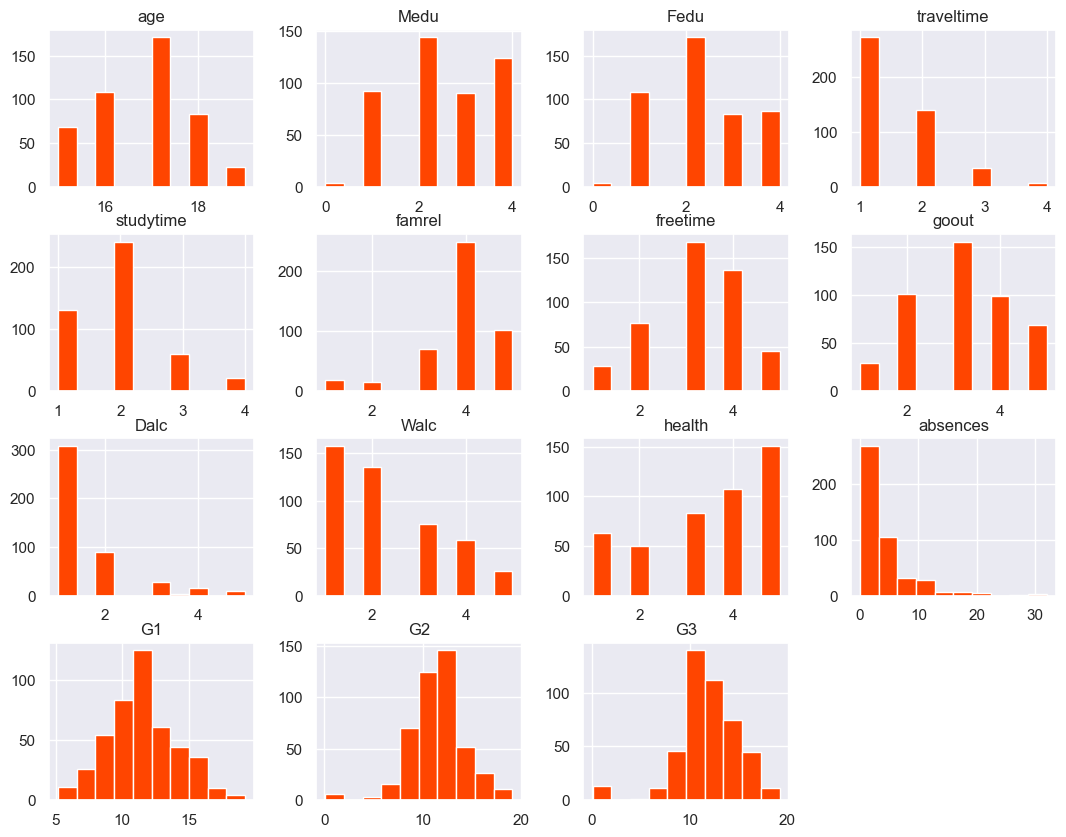

In [45]:
#값의 분포 확인하기 - numeric
df.hist(bins=10, figsize=(13,10), color='orangered');

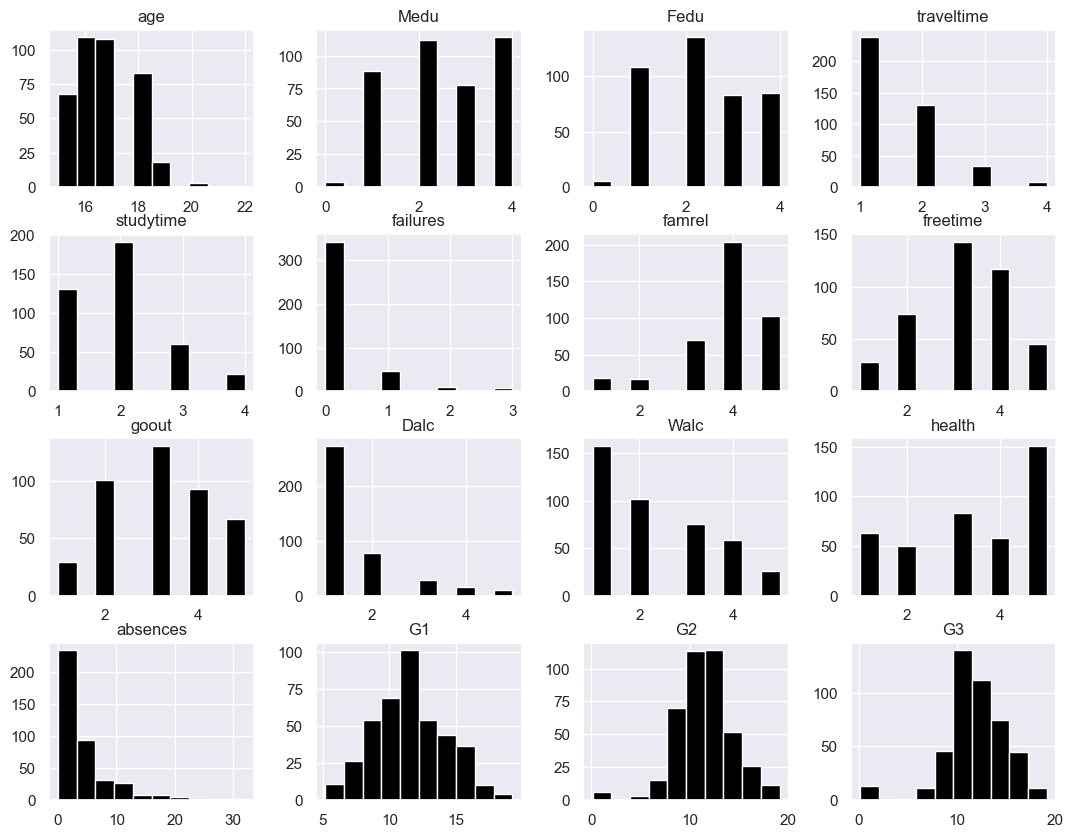

In [35]:
mark_data.hist(bins=10, figsize=(13,10), color='black');

In [30]:
cat_col = df.select_dtypes(exclude=np.number).columns.tolist()

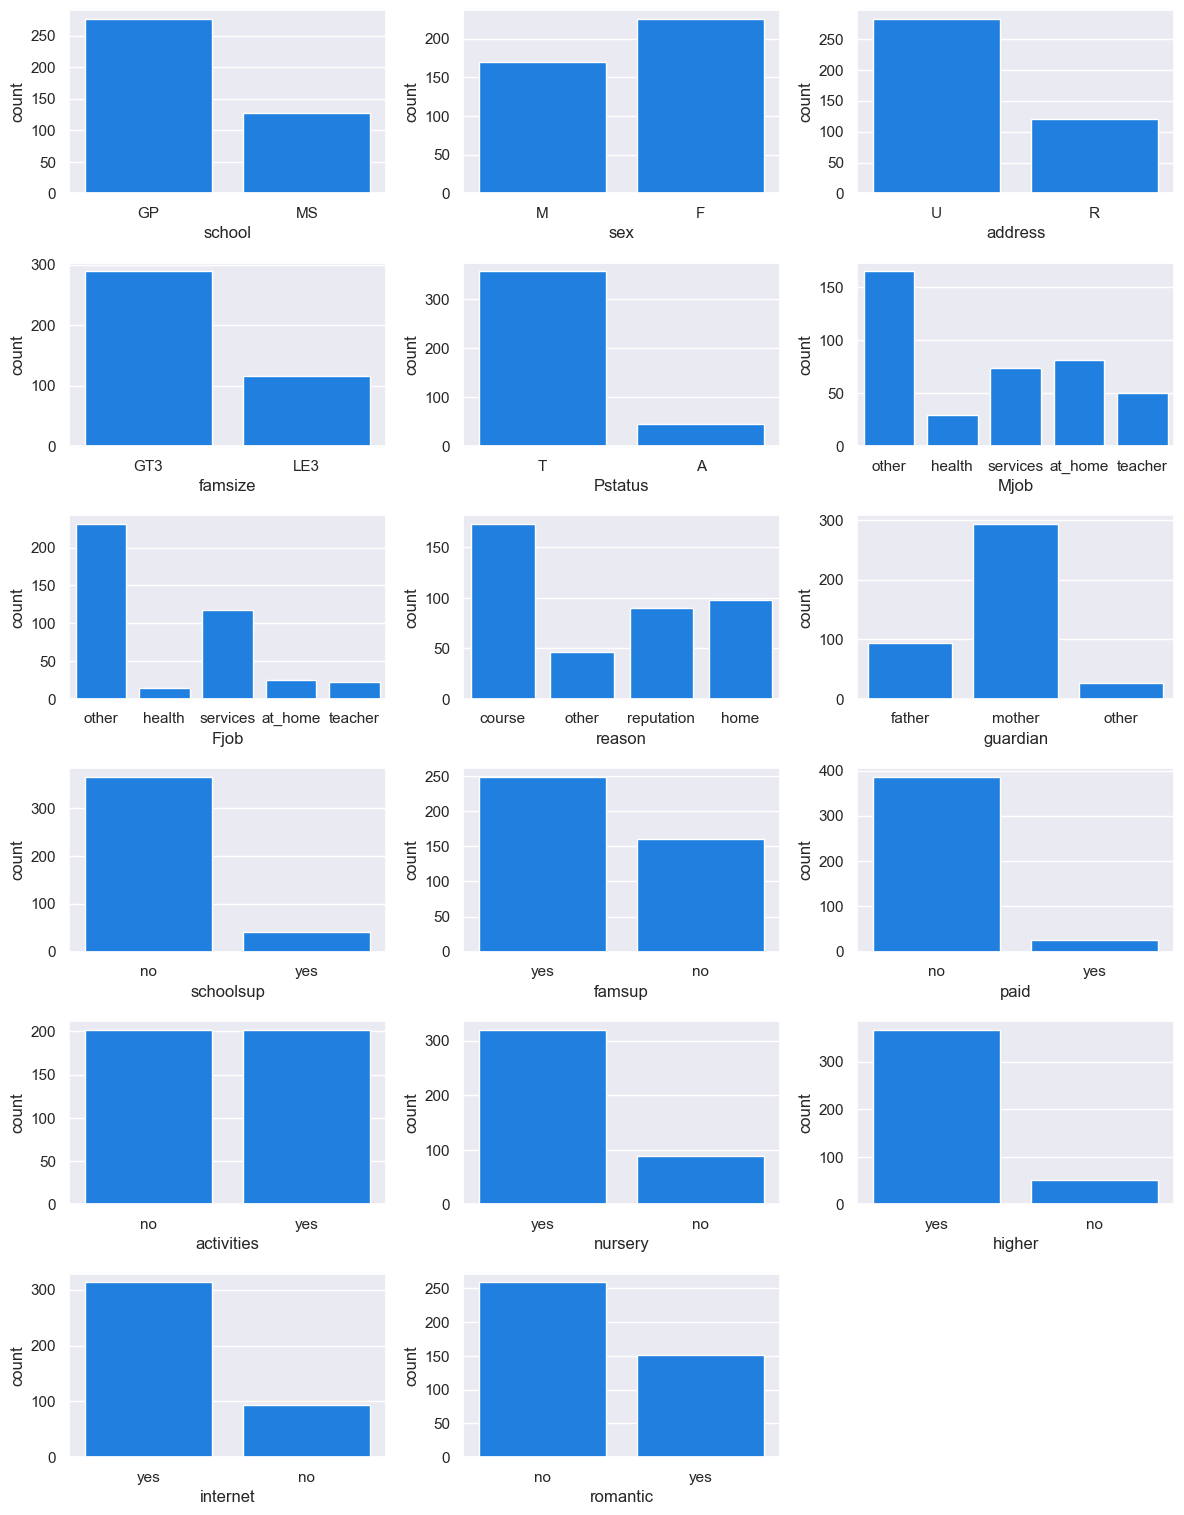

In [34]:
sns.set(palette="gist_ncar")
plt.figure(figsize=(12, 30), layout='tight')

for col in cat_col:
    plt.subplot(12, 3, cat_col.index(col) + 1)  # Adjust the subplot layout as needed
    sns.countplot(x=col, data=mark_data)

#### Pipeline

In [4]:
from sklearn.model_selection import train_test_split

target = df['G3']
features = df.drop(columns='G3')

train_X, test_X, train_y, test_y = train_test_split(features, target, test_size=0.2, random_state=42)

In [5]:
train_X.shape, train_y.shape

((363, 33), (363,))

In [30]:
train_X.head()

,ID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
24,77,MS,NaN,19.0,R,GT3,T,1.0,1.0,other,...,no,5.0,4.0,NaN,3.0,3.0,2.0,8.0,10.137151,9.141194
17,613,GP,F,16.0,U,GT3,T,4.0,2.0,teacher,...,no,5.0,3.0,3.0,1.0,1.0,1.0,2.0,13.192646,14.209382
66,105,GP,F,17.0,U,GT3,A,4.0,4.0,NaN,...,no,4.0,1.0,NaN,1.0,1.0,NaN,2.0,10.108769,13.194439
371,39,NaN,M,16.0,U,GT3,T,4.0,4.0,services,...,yes,4.0,4.0,3.0,1.0,1.0,4.0,0.0,16.181053,NaN
253,22,MS,M,18.0,R,GT3,NaN,1.0,3.0,at_home,...,no,3.0,3.0,4.0,NaN,4.0,3.0,0.0,8.235095,10.122261


In [6]:
test_X.shape, test_y.shape

((91, 33), (91,))

In [7]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [398]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin

class GroupbyImputer(BaseEstimator, TransformerMixin):
    
    ''' 
    그룹별 통계값으로 결측치를 대체하는 클래스입니다.
    group : 결측치 대체의 그룹으로 사용할 컬럼
    nan_feature : 결측치가 있는 컬럼
    strategy : 결측치 대체 전략으로, 'mean','median','mode'를 매개변수로 받을 수 있습니다.
    
    '''
    
    def __init__(self, group, nan_feature, strategy):
        self.group = group
        self.nan_feature = nan_feature
        self.strategy = strategy if strategy != 'mode' else lambda x: x.mode().iloc[0]       
        

    def fit(self, X, y=None):
        #각 그룹별 self.strategy로 바꾼 X 데이터프레임 저장
        self.groupbydf = X.groupby(self.group)[self.nan_feature].transform(self.strategy)
        return self

    
    def transform(self, X):
        #결측있는 인덱스와 self.groupbydf 인덱스의 값으로 결측치 채움  
        X[self.nan_feature].fillna(self.groupbydf, inplace=True)
        return X

In [146]:
simple_num = ['studytime','famrel','Walc','health', 'age']
simple_cat = ['address','famsize','Pstatus','Mjob','Fjob',
              'reason','guardian','schoolsup','famsup','paid',
              'nursery','higher','internet','romantic']

In [410]:
#1. 단순 결측치 처리 파이프라인
simple_IMP = ColumnTransformer(
    transformers=[('sim_num',SimpleImputer(strategy="median"), simple_num),
                  ('sim_cat',SimpleImputer(strategy="most_frequent"), simple_cat)],
    remainder='passthrough', verbose_feature_names_out=False
)

In [199]:
#사용자 정의 객체 설정

max_limit = lambda x: np.where(x >= 19, 19, x)
limit_transformer = FunctionTransformer(max_limit)

log_transformer = FunctionTransformer(np.log1p)

In [399]:
#2.num-그룹별 중앙값 1 파이프라인
imputegroupby_1 = Pipeline(steps=[
    ('fedu', GroupbyImputer(group='Fjob',nan_feature='Fedu', strategy='median')),
    ('medu', GroupbyImputer(group='Mjob',nan_feature='Medu', strategy='median')),
    ('group_Walc', GroupbyImputer(group='Walc',nan_feature='Dalc', strategy='median')),
    ('group_Walc2', GroupbyImputer(group='Walc',nan_feature='goout', strategy='median')),
    ('group_Walc3', GroupbyImputer(group='Walc',nan_feature='absences', strategy='median'))
])

In [400]:
#3.num-그룹별 중앙값 2 파이프라인
imputegroupby_2 = Pipeline(steps=[
    ('G1', GroupbyImputer(group='studytime',nan_feature='G1', strategy='median')),
    ('G2', GroupbyImputer(group='studytime',nan_feature='G2', strategy='median')),
    ('free', GroupbyImputer(group='goout',nan_feature='freetime', strategy='median')),
    ('travel', GroupbyImputer(group='freetime',nan_feature='traveltime', strategy='median'))
])

In [401]:
#4.cat-그룹별 최빈값 3 파이프라인
imputegroupby_3 = Pipeline(steps=[
    ('sex', GroupbyImputer(group='Walc',nan_feature='sex', strategy='mode')),
    ('activities', GroupbyImputer(group='freetime',nan_feature='activities', strategy='mode')),
    ('school', GroupbyImputer(group='address',nan_feature='school', strategy='mode'))
])

In [402]:
num = ['ID',  'Medu', 'Fedu', 'traveltime', 'studytime', 
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 
       'G1', 'G2']

cat = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']

In [444]:
binning_pipe= Pipeline(steps=[
    ('log_scale', log_transformer)])

In [445]:
limit_scale_pipe = Pipeline(steps=[
    ('limit', limit_transformer),
    ('scale', MinMaxScaler())])

In [446]:
#5. 스케일 컬럼 
scale = ColumnTransformer(
    transformers=[('num_scale', MinMaxScaler(), num),
                  ('cat_scale', OneHotEncoder(), cat),
                  ('age_limit_scale', limit_scale_pipe, ['age']),
                  ('abs_log_bin', binning_pipe , ['absences'])],
    remainder='drop', verbose_feature_names_out=False
)

In [447]:
#전처리 1 파이프라인

preprocessor1 = make_pipeline(
       simple_IMP
)

In [448]:
#전처리 2 파이프라인

preprocessor2 = make_pipeline(
    imputegroupby_1,
    imputegroupby_2,
    imputegroupby_3,
    scale
)

In [449]:
preprocessor1.fit(train_X)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('sim_num',
                                                  SimpleImputer(strategy='median'),
                                                  ['studytime', 'famrel',
                                                   'Walc', 'health', 'age']),
                                                 ('sim_cat',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['address', 'famsize',
                                                   'Pstatus', 'Mjob', 'Fjob',
                                                   'reason', 'guardian',
                                                   'schoolsup', 'famsup',
                                                   'paid', 'nursery', 'higher',
                                                   'internet', 'romantic'])],
                                   verbose_feature_names_out=False))])

In [460]:
simple_imp = preprocessor1.fit_transform(train_X)
col1 = preprocessor1.get_feature_names_out()

In [461]:
simple_test = preprocessor1.transform(test_X)
col1 = preprocessor1.get_feature_names_out()

In [462]:
pre1_test = pd.DataFrame(simple_test, columns=col1)

In [452]:
 preprocessor2.fit(pre1)

Pipeline(steps=[('pipeline-1',
                 Pipeline(steps=[('fedu',
                                  GroupbyImputer(group='Fjob',
                                                 nan_feature='Fedu',
                                                 strategy='median')),
                                 ('medu',
                                  GroupbyImputer(group='Mjob',
                                                 nan_feature='Medu',
                                                 strategy='median')),
                                 ('group_Walc',
                                  GroupbyImputer(group='Walc',
                                                 nan_feature='Dalc',
                                                 strategy='median')),
                                 ('group_Walc2',
                                  GroupbyImputer(group='Walc',
                                                 nan_feature='goout',
                                                 strategy='...
                                                   'schoolsup', 'famsup',
                                                   'paid', 'activities',
                                                   'nursery', 'higher',
                                                   'internet', 'romantic']),
                                                 ('age_limit_scale',
                                                  Pipeline(steps=[('limit',
                                                                   FunctionTransformer(func=<function <lambda> at 0x00000262886D95A0>)),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['age']),
                                                 ('abs_log_bin',
                                                  Pipeline(steps=[('log_scale',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                  ['absences'])],
                                   verbose_feature_names_out=False))])

In [453]:
pre2 = preprocessor2.fit_transform(pre1)

In [463]:
pre2_test = preprocessor2.transform(pre1_test)

In [454]:
lr = LinearRegression()

In [455]:
lr.fit(pre2, train_y)

LinearRegression()

In [464]:
lr.score(pre2_test, test_y)

0.8454063446804698

In [456]:
lr.score(pre2, train_y)

0.791283074691948

In [457]:
from sklearn.metrics import mean_squared_error

In [458]:
y_pred = lr.predict(pre2)

In [465]:
y_pred_test = lr.predict(pre2_test)

In [459]:
mean_squared_error(y_pred, train_y, squared = True)

2.181422963069043

In [466]:
mean_squared_error(y_pred_test, test_y, squared = True)

1.8795495147958985

타겟 G3빼고 전부 결측치 존재

### 3. Pipeline